# Dogs and Cats Image Data
- Train Data: 2000(1000 dogs, 1000 cats)
- Valid Data: 1000(500 dogs, 500 cats)
- Test Data: 1000(500 dogs, 500 cats)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.models import load_model
from keras import backend as K

In [5]:
import tensorflow as tf

In [6]:
keras.__version__ , tf.__version__

('2.4.3', '2.4.1')

In [7]:
tf.test.gpu_device_name()

!nvidia-smi

Tue Mar 23 02:34:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    26W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4IuIgYtSdtNtXmtziUrETMr2A3DvBi0uC6nSRK503dOrS6y0zfVcI
Mounted at /content/drive


In [9]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


## 2. Data Preprocessing

### 1) Unzip 'dogs_and_cats_small.zip'

In [10]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [11]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 23 02:34 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 23 02:34 test
drwxr-xr-x 4 root root 4096 Mar 23 02:34 train
drwxr-xr-x 4 root root 4096 Mar 23 02:34 validation


### 2) Image File Directory Setting
- train_dir
- valid_dir
- test_dir

In [12]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [ ]:
K.clear_session()

### 3) ImageDataGenerator() & flow_from_directory()
- Normalization
  - ImageDataGenerator()
- Resizing & Generator
  - flow_from_directory()

In [81]:
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
# ImageDataGenerator 클래스에 대한 객체 지정

train_generator = train_datagen.flow_from_directory( # directory로부터 가져옴
    train_dir,
    target_size = (256, 256),
    # 이미지 사이즈가 모두 다름. 정확히는 (150, 150, 3)으로 변경됨(컬러이므로)
    # openCV 같은 것을 사용하여 image resize 해도 됨
    # train_dir에는 이미지가 2000장 
    batch_size = 20,
    # 2000장을 한번에 20개씩 불러서 처리
    # 서로 다른 디렉토리에서 나오는 사진이 강아지인지 고양이인지 모른다
    class_mode = 'binary'
    # cats: 0으로, dogs: 1로 labeling 해준다 (labeling 생성)
    # categorical 하면 OHE 되어 나온다
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (256, 256),
    batch_size = 20,
    class_mode = 'binary'
)


# 각각 1000개인지는 모른다
# 2개의 sub directory, 2000개 image

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 4) Test train_generator

In [82]:
for data_batch, labels_batch in train_generator :
  print('배치 데이터 크기: ' , data_batch.shape)
  print('배치 레이블 크기: ' , labels_batch.shape)
  break

배치 데이터 크기:  (20, 256, 256, 3)
배치 레이블 크기:  (20,)


## 3. CNN Keras Modeling

### 1) Model Define
- Feature Extraction & Classification

In [124]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [125]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_183 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 28, 28, 128)     

### 2) Model Compile

In [126]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam' ,
              metrics = ['accuracy']) # positive가 있는 것은 아니므로 accuracy를 본다

### 3) Model Fit
- 모델 학습 수행
  - 약 10분

In [127]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 20,
                       validation_data = valid_generator,
                       validation_steps = 50)

# fit과 fit_generator: 20개씩 넘겨받으며 학습
# 지금은 y_train이 없고, generator를 통과해야 labeling이 되어 y_train이 생성됨
# train_generator를 X_train, y_train 위치에 둠
# steps_per_epoch: 한번에 20개씩 내보내므로, 2000장을 다 보려면 100번
# validation_steps: validation은 1000장이므로 50번
# 셔플해서 꺼내옴

Epoch 1/20
100/100 [==============================] - 13s 116ms/step - loss: 0.7039 - accuracy: 0.5329 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 11s 114ms/step - loss: 0.6942 - accuracy: 0.4607 - val_loss: 0.6928 - val_accuracy: 0.5010
Epoch 3/20
100/100 [==============================] - 11s 114ms/step - loss: 0.6937 - accuracy: 0.5128 - val_loss: 0.6852 - val_accuracy: 0.5000
Epoch 4/20
100/100 [==============================] - 11s 114ms/step - loss: 0.6903 - accuracy: 0.5093 - val_loss: 0.6770 - val_accuracy: 0.5280
Epoch 5/20
100/100 [==============================] - 12s 115ms/step - loss: 0.6712 - accuracy: 0.5407 - val_loss: 0.6930 - val_accuracy: 0.5010
Epoch 6/20
100/100 [==============================] - 11s 114ms/step - loss: 0.6934 - accuracy: 0.4978 - val_loss: 0.6900 - val_accuracy: 0.5470
Epoch 7/20
100/100 [==============================] - 11s 114ms/step - loss: 0.6807 - accuracy: 0.5659 - val_loss: 0.6930 - val_ac

### 4) 학습결과 시각화
- Loss Visualization

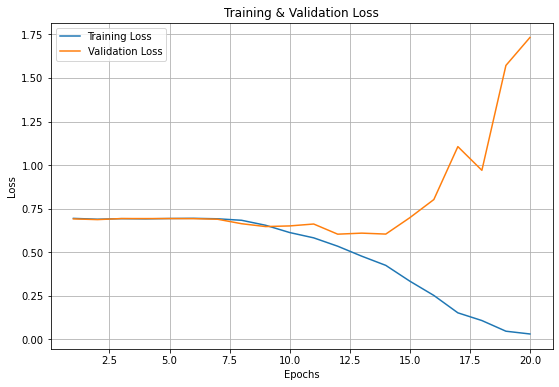

In [63]:
epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
plt.show()

- Accuracy Visualization

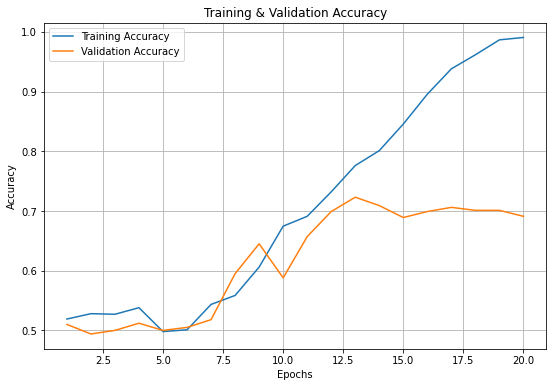

In [64]:
epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()
plt.show()

### 5) Model Evaluate
- test_generator

In [128]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


- Loss & Accuracy

In [129]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

50/50 [==============================] - 4s 73ms/step - loss: 2.0607 - accuracy: 0.6630
Loss: 2.06066
Accuracy: 0.66300


## Model Save & Load to Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40561
-rw------- 1 root root    34592 Mar 18 02:42 001_Model_iris.h5
-rw------- 1 root root 41498896 Mar 23 02:18 002_dogs_and_cats_small.h5


### 3) Model Load

In [ ]:
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')
# test_generator

In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss: {:.5f}' .format(loss))
print('Accuracy: {:.5f}' .format(accuracy))

50/50 [==============================] - 3s 56ms/step - loss: 3.8177 - accuracy: 0.7080
Loss: 3.81771
Accuracy: 0.70800
